In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model_type = ['lstm', 'gru', 'nn', 'dt', 'knn', 'lasso', 'ridge', 'lr']
metric_lst = []
for model_name in model_type:
    with open(f'performance_metric_{model_name}.plk', 'rb') as f:
        metric_lst.append(pickle.load(f))

In [5]:
metric_lst[0].keys()

dict_keys(['mae_train', 'mae_test', 'mape_train', 'mape_test', 'p50ae_train', 'p50ae_test'])

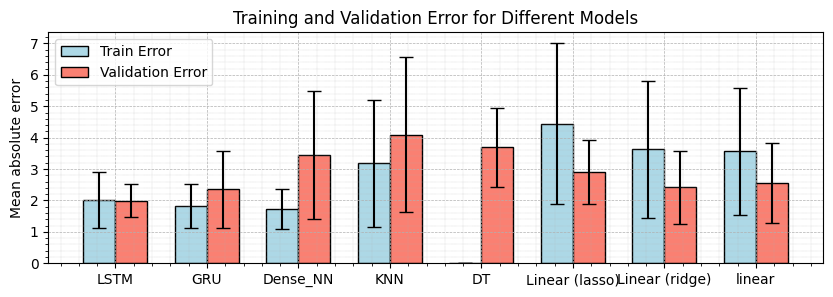

In [6]:
# Data for the four models
models = ['LSTM', 'GRU', 'Dense_NN', 'KNN', 'DT', 'Linear (lasso)', 'Linear (ridge)', 'linear']
train_errors = [what['mae_train'].mean() for what in metric_lst]  # Mean training errors for each model
validation_errors = [what['mae_test'].mean() for what in metric_lst]   # Mean validation errors for each model
train_error_bars = [what['mae_train'].std() for what in metric_lst]   # Training error margins
validation_error_bars = [what['mae_test'].std() for what in metric_lst] # Validation error margins

# X positions for each model
x_pos = np.arange(len(models))
width = 0.35  # Width of each bar

# Plotting

fig, ax = plt.subplots(figsize = (10,3))
train_bars = ax.bar(x_pos - width/2, train_errors, width, yerr=train_error_bars, capsize=5, label='Train Error', color='lightblue', edgecolor='black')
validation_bars = ax.bar(x_pos + width/2, validation_errors, width, yerr=validation_error_bars, capsize=5, label='Validation Error', color='salmon', edgecolor='black')

# Customization
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_ylabel('Mean absolute error')
ax.set_title('Training and Validation Error for Different Models')
ax.legend()
ax.minorticks_on()
ax.grid(which='both', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.3)

# Show the plot
plt.show()